In [1]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import fastprop
import os
from rdkit import Chem
import scipy
from matplotlib import cm
from matplotlib.colors import Normalize 
import seaborn as sns
from sklearn.metrics import mean_squared_error 
from pathlib import Path
from matplotlib_venn import venn2
from matplotlib_venn import venn2_circles
from scipy.stats import gaussian_kde
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap,LogNorm
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error 
from fastsolv_analysis.util import stats, solprop_parity_plot, parity_plot

C:\Users\ChemeGrad2021\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
matplotlib.rcParams.update({'font.style': 'normal'})
matplotlib.rcParams.update({'font.sans-serif': 'Segoe UI'})
matplotlib.rcParams.update({'font.size': 26})

colors = sns.color_palette(palette='Accent').as_hex()

Set source directory

In [6]:
_src_dir: str = os.path.join(r"C:\Users\ChemeGrad2021\Documents\highsol\final_results\chemberta_predictions")

Chemberta performance

In [8]:
leeds_acetone: pd.DataFrame = pd.read_csv(os.path.join(_src_dir, "leeds_acetone_predictions.csv"))
leeds_benzene: pd.DataFrame = pd.read_csv(os.path.join(_src_dir, "leeds_benzene_predictions.csv"))
leeds_ethanol: pd.DataFrame = pd.read_csv(os.path.join(_src_dir, "leeds_ethanol_predictions.csv"))

leeds_all = pd.concat([leeds_acetone, leeds_benzene, leeds_ethanol], ignore_index=True, axis=0) 

In [9]:
mse_leeds_chemberta, percentage_within_1_unit_leeds_chemberta = stats(leeds_all['logS_true'], leeds_all['logS_pred'])
print("RMSE Chemberta= " + f"{np.sqrt(mse_leeds_chemberta)}", "\nPercentage within 1 logS for Fastprop = " + f"{percentage_within_1_unit_leeds_chemberta}")

RMSE Chemberta= 1.2642178636656474 
Percentage within 1 logS for Fastprop = 57.03245749613601


<AxesSubplot: xlabel='True $logS$', ylabel='$\\hat{logS}$'>

<Figure size 640x480 with 0 Axes>

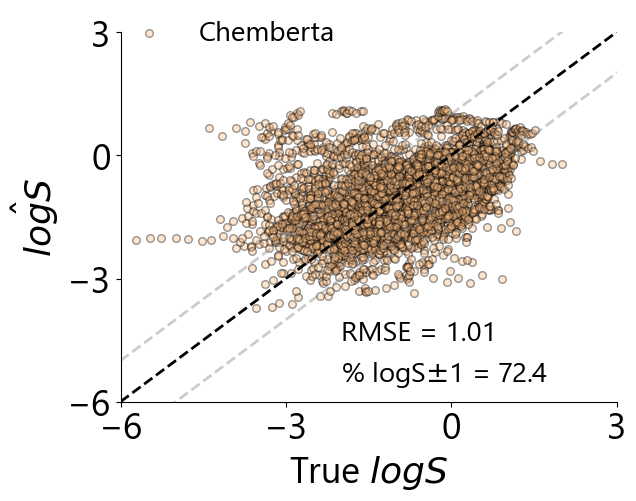

In [12]:
chemberta_solprop_predictions: pd.DataFrame = pd.read_csv(os.path.join(_src_dir, "solprop_nonaq_predictions.csv"))
#chemberta_solprop_predictions[['solvent smiles', 'solute smiles']] = chemberta_solprop_predictions['smiles'].str.split('.', n=1, expand=True)
#chemberta_solprop_predictions
#solute_smiles = chemberta_solprop_predictions.pop('solute smiles')  
#solvent_smiles = chemberta_solprop_predictions.pop('solvent smiles')  

#both = chemberta_solprop_predictions.pop('smiles')  

#chemberta_solprop_predictions.insert(0, 'solvent smiles', solvent_smiles) 
#chemberta_solprop_predictions.insert(0, 'solute smiles', solute_smiles) 

mse_chemberta_solprop, percentage_within_1_unit_chemberta_solprop = stats(chemberta_solprop_predictions['logS_true'], chemberta_solprop_predictions['logS_pred'])
solprop_parity_plot(chemberta_solprop_predictions['logS_true'],
            chemberta_solprop_predictions['logS_pred'],
            'Chemberta', 
            [colors[2]],
            mse_chemberta_solprop, 
            percentage_within_1_unit_chemberta_solprop)

In [13]:
print(pearsonr(chemberta_solprop_predictions['logS_true'],
            chemberta_solprop_predictions['logS_pred']))


print(mean_absolute_error(chemberta_solprop_predictions['logS_true'],
          chemberta_solprop_predictions['logS_pred']))

print(mean_absolute_error(leeds_all['logS_true'],
          leeds_all['logS_pred']))

PearsonRResult(statistic=0.42847443741028207, pvalue=1.3750469155179338e-232)
0.7702707593938161
1.013109675739507


MolFormer performance on Leeds

In [14]:
_src_dir: str = os.path.join(r"C:\Users\ChemeGrad2021\Documents\highsol\final_results\molformer_predictions")
leeds_acetone_molformer: pd.DataFrame = pd.read_csv(os.path.join(_src_dir, "leeds_acetone_chemprop_predictions.csv"))
leeds_acetone_molformer['logS_true'] = leeds_acetone['logS_true']
leeds_benzene_molformer: pd.DataFrame = pd.read_csv(os.path.join(_src_dir, "leeds_benzene_chemprop_predictions.csv"))
leeds_benzene_molformer['logS_true'] = leeds_benzene['logS_true']
leeds_ethanol_molformer: pd.DataFrame = pd.read_csv(os.path.join(_src_dir, "leeds_ethanol_chemprop_predictions.csv"))
leeds_ethanol_molformer['logS_true'] = leeds_ethanol['logS_true']

leeds_all_molformer = pd.concat([leeds_acetone_molformer, leeds_benzene_molformer, leeds_ethanol_molformer], ignore_index=True, axis=0) 

In [16]:
mse_leeds_molformer, percentage_within_1_unit_leeds_molformer = stats(leeds_all_molformer['logS_true'], leeds_all_molformer['logS_pred'])
print("MSE chemprop= " + f"{np.sqrt(mse_leeds_molformer)}", "\nPercentage within 1 logS for MolFormer = " + f"{percentage_within_1_unit_leeds_molformer}")

MSE chemprop= 1.071078334956174 
Percentage within 1 logS for MolFormer = 63.98763523956723


<AxesSubplot: xlabel='True $logS$', ylabel='$\\hat{logS}$'>

<Figure size 640x480 with 0 Axes>

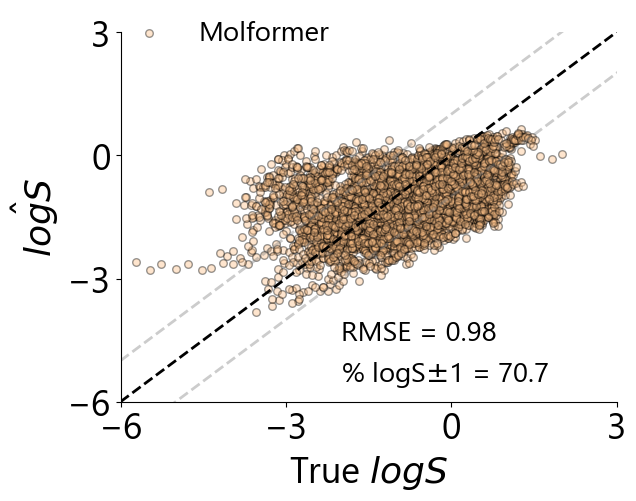

In [17]:
molformer_solprop_predictions: pd.DataFrame = pd.read_csv(os.path.join(_src_dir, "solprop_chemprop_nonaq_predictions.csv"))

mse_molformer_solprop, percentage_within_1_unit_molformer_solprop = stats(molformer_solprop_predictions['logS_true'], molformer_solprop_predictions['logS_pred'])
solprop_parity_plot(molformer_solprop_predictions['logS_true'],
            molformer_solprop_predictions['logS_pred'],
            'Molformer', 
            [colors[2]],
            mse_molformer_solprop, 
            percentage_within_1_unit_molformer_solprop)

In [18]:
print(pearsonr(molformer_solprop_predictions['logS_true'],
            molformer_solprop_predictions['logS_pred']))

print(mean_absolute_error(molformer_solprop_predictions['logS_true'],
          molformer_solprop_predictions['logS_pred']))

print(mean_absolute_error(leeds_all_molformer['logS_true'],
          leeds_all_molformer['logS_pred']))

PearsonRResult(statistic=0.45757684092609063, pvalue=4.72852652096649e-269)
0.7666594061850427
0.8560899082634494


Plotting all together for Figure 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


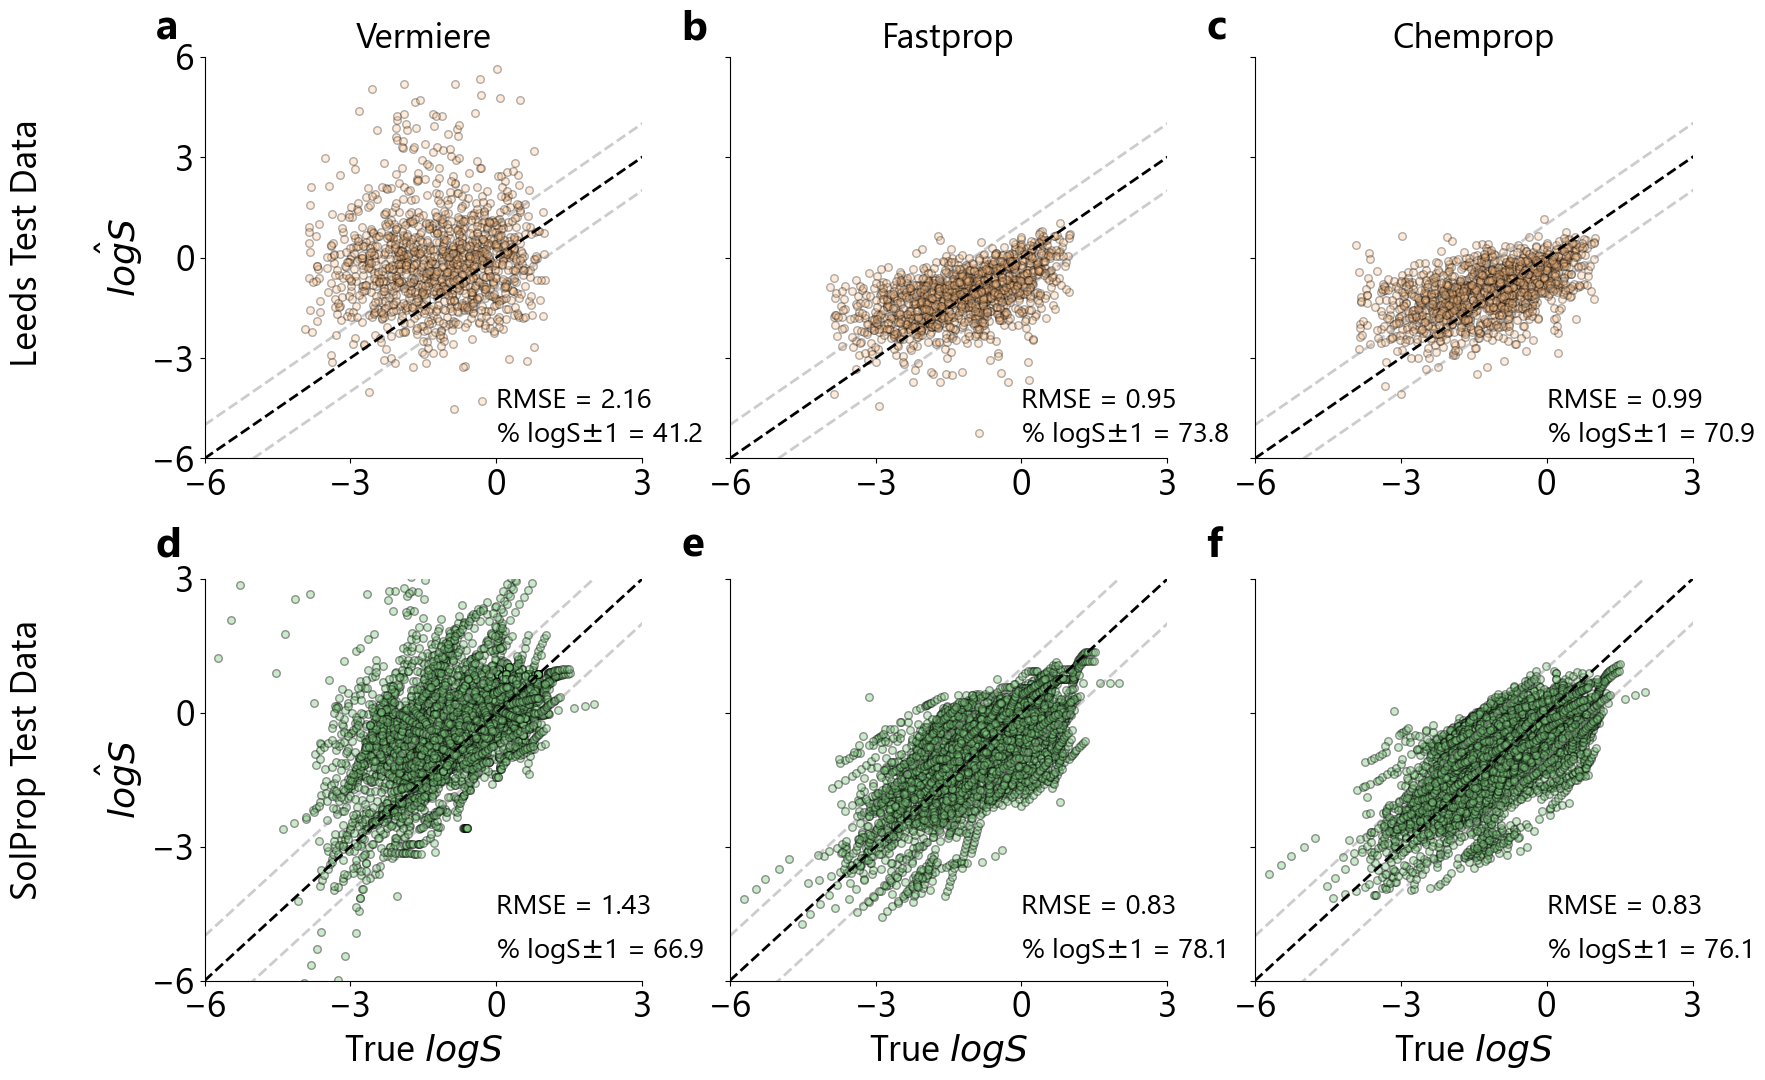

In [ ]:
plt.figure(figsize=[6.4*3,4.8*2.5])
ax1 = plt.subplot2grid(shape=(2,3), loc=(0,0), colspan=1)
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#EEEEEE','#696969', '#ab3675',colors[5]])

ax1.plot([-6, 6], [-6,6], linestyle = '--', linewidth = 2, color = 'black')
ax1.plot([-6, 6], [-5,7], linestyle = '--', linewidth = 2, color = 'gray', alpha = 0.4)
ax1.plot([-6, 6], [-7,5], linestyle = '--', linewidth = 2, color = 'gray', alpha = 0.4)


# Calculate the point density
xy = np.vstack([leeds_all_solprop['logS_true'],leeds_all_solprop['logST (method1) [log10(mol/L)]']])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = leeds_all_solprop['logS_true'][idx], leeds_all_solprop['logST (method1) [log10(mol/L)]'][idx], z[idx]


# sc = ax1.scatter(x, y, c=z, s=30, cmap=custom_cmap, norm= LogNorm())
# cbar = plt.colorbar(sc, ax=ax1)
# cbar.set_label('Density')
ax1.scatter(leeds_all_solprop['logS_true'],leeds_all_solprop['logST (method1) [log10(mol/L)]'], alpha =0.3, s = 30, edgecolors = 'black', color = colors[2])


ax1.set_xlim([-6, 3])
ax1.set_xticks([-6, -3, 0, 3])
ax1.set_ylim([-6,6])
ax1.set_yticks([-6, -3, 0, 3, 6])

ax1.set_ylabel(r"$\hat{logS}$")
#ax1.set_xlabel(r"True $logS$")
ax1.legend(prop={'size': 20}, loc = 'upper right', frameon = False, bbox_to_anchor=(1.1,0.6)) 
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_title("Vermiere", fontsize = 25)
ax1.text(-0,-4.5, f"RMSE = {np.sqrt(mse_leeds_solprop):.2f}", fontsize = 20)
ax1.text(-0,-5.5, '% logS' + r'$\pm$'  + f"1 = {percentage_within_1_unit_leeds_solprop:.1f}", fontsize = 20)
ax1.text(-7, 6.5, "a", weight='bold', fontsize = 30)
ax1.text(-10, -3, "Leeds Test Data", rotation = 'vertical')

ax2 = plt.subplot2grid(shape=(2,3), loc=(0,1), colspan=1)

ax2.plot([-6, 6], [-6,6], linestyle = '--', linewidth = 2, color = 'black')
ax2.plot([-6, 6], [-5,7], linestyle = '--', linewidth = 2, color = 'gray', alpha = 0.4)
ax2.plot([-6, 6], [-7,5], linestyle = '--', linewidth = 2, color = 'gray', alpha = 0.4)

ax2.scatter(leeds_all['logS_true'],leeds_all['logS_pred'], alpha =0.3, s = 30, edgecolors = 'black', color = colors[2])

ax2.set_xlim([-6, 3])
ax2.set_xticks([-6, -3, 0, 3])
ax2.set_ylim([-6,6])
ax2.set_yticks([-6, -3, 0, 3, 6])
ax2.set_yticklabels([])

#ax2.set_ylabel(r"$\hat{logS}$")
#ax2.set_xlabel(r"True $logS$")
ax2.legend(prop={'size': 20}, loc = 'upper right', frameon = False, bbox_to_anchor=(1.1,0.6)) 
ax2.spines[['right', 'top']].set_visible(False)
ax2.text(-0,-4.5, f"RMSE = {np.sqrt(mse_leeds_fastprop):.2f}", fontsize = 20)
ax2.text(-0,-5.5, '% logS' + r'$\pm$'  + f"1 = {percentage_within_1_unit_leeds_fastprop:.1f}", fontsize = 20)
ax2.text(-7, 6.5, "b", weight='bold', fontsize = 30)

ax2.set_title("Fastprop", fontsize = 25)

ax3 = plt.subplot2grid(shape=(2,3), loc=(0,2), colspan=1)

ax3.plot([-6, 6], [-6,6], linestyle = '--', linewidth = 2, color = 'black')
ax3.plot([-6, 6], [-5,7], linestyle = '--', linewidth = 2, color = 'gray', alpha = 0.4)
ax3.plot([-6, 6], [-7,5], linestyle = '--', linewidth = 2, color = 'gray', alpha = 0.4)

ax3.scatter(leeds_all_chemprop['logS_true'],leeds_all_chemprop['logS_pred'], alpha =0.3, s = 30, edgecolors = 'black', color = colors[2])

ax3.set_xlim([-6, 3])
ax3.set_xticks([-6, -3, 0, 3])

ax3.set_ylim([-6,6])
ax3.set_yticks([-6, -3, 0, 3, 6])
ax3.set_yticklabels([])

#ax3.set_ylabel(r"$\hat{logS}$")
#ax3.set_xlabel(r"True $logS$")
ax3.legend(prop={'size': 20}, loc = 'upper right', frameon = False, bbox_to_anchor=(1.08,0.3)) 
ax3.text(-0,-4.5, f"RMSE = {np.sqrt(mse_leeds_molformer):.2f}", fontsize = 20)
ax3.text(-0,-5.5, '% logS' + r'$\pm$'  + f"1 = {percentage_within_1_unit_leeds_molformer:.1f}", fontsize = 20)
ax3.text(-7, 6.5, "c", weight='bold', fontsize = 30)

#ax3.text(1,-5.5, "RMSE = 2.01", fontsize = 20)
ax3.spines[['right', 'top']].set_visible(False)
ax3.set_title("Chemprop", fontsize = 25)

ax4 = plt.subplot2grid(shape=(2,3), loc=(1,0), colspan=1)
ax4.plot([-6, 6], [-6,6], linestyle = '--', linewidth = 2, color = 'black')
ax4.plot([-6, 6], [-7,5], linestyle = '--', linewidth = 2, color = 'gray', alpha = 0.4)
ax4.plot([-6, 6], [-5,7], linestyle = '--', linewidth = 2, color = 'gray', alpha = 0.4)
ax4.scatter(solprop_solprop_predictions['logS_true'],solprop_solprop_predictions['logS_pred'], alpha =0.4, s = 30, edgecolors = 'black', color = colors[0])
ax4.set_xlim([-6,3])
ax4.set_xticks([-6, -3, 0, 3])
ax4.set_ylim([-6,3])
ax4.set_yticks([-6, -3, 0, 3])
ax4.set_ylabel(r"$\hat{logS}$")
ax4.set_xlabel(r"True $logS$")
#ax4.legend(prop={'size': 20}, loc = 'upper left', frameon = False, bbox_to_anchor=(-0.05,1.1)) 
ax4.text(0,-4.5, f"RMSE = {np.sqrt(mse_solprop_solprop):.2f}", fontsize = 20)
ax4.text(0,-5.5, '% logS' + r'$\pm$'  + f"1 = {percentage_within_1_unit_solprop_solprop:.1f}", fontsize = 20)
ax4.spines[['right', 'top']].set_visible(False)
ax4.text(-7, 3.5, "d", weight='bold', fontsize = 30)
ax4.text(-10, -4, "SolProp Test Data", rotation = 'vertical')


ax5 = plt.subplot2grid(shape=(2,3), loc=(1,1), colspan=1)
ax5.plot([-6, 6], [-6,6], linestyle = '--', linewidth = 2, color = 'black')
ax5.plot([-6, 6], [-7,5], linestyle = '--', linewidth = 2, color = 'gray', alpha = 0.4)
ax5.plot([-6, 6], [-5,7], linestyle = '--', linewidth = 2, color = 'gray', alpha = 0.4)
ax5.scatter(chemberta_solprop_predictions['logS_true'],chemberta_solprop_predictions['logS_pred'], alpha =0.4, s = 30, edgecolors = 'black', color = colors[0])
ax5.set_xlim([-6,3])
ax5.set_xticks([-6, -3, 0, 3])
ax5.set_ylim([-6,3])
ax5.set_yticks([-6, -3, 0, 3])
ax5.set_yticklabels([])
#ax5.set_ylabel(r"$\hat{logS}$")
ax5.set_xlabel(r"True $logS$")
#ax5.legend(prop={'size': 20}, loc = 'upper left', frameon = False, bbox_to_anchor=(-0.05,1.1)) 
ax5.text(0,-4.5, f"RMSE = {np.sqrt(mse_chemberta_solprop):.2f}", fontsize = 20)
ax5.text(0,-5.5, '% logS' + r'$\pm$'  + f"1 = {percentage_within_1_unit_chemberta_solprop:.1f}", fontsize = 20)
ax5.spines[['right', 'top']].set_visible(False)
ax5.text(-7, 3.5, "e", weight='bold', fontsize = 30)


ax6 = plt.subplot2grid(shape=(2,3), loc=(1,2), colspan=1)
ax6.plot([-6, 6], [-6,6], linestyle = '--', linewidth = 2, color = 'black')
ax6.plot([-6, 6], [-7,5], linestyle = '--', linewidth = 2, color = 'gray', alpha = 0.4)
ax6.plot([-6, 6], [-5,7], linestyle = '--', linewidth = 2, color = 'gray', alpha = 0.4)
ax6.scatter(molformer_solprop_predictions['logS_true'],molformer_solprop_predictions['logS_pred'], alpha =0.4, s = 30, edgecolors = 'black', color = colors[0])
ax6.set_xlim([-6,3])
ax6.set_xticks([-6, -3, 0, 3])
ax6.set_ylim([-6,3])
ax6.set_yticks([-6, -3, 0, 3])
ax6.set_yticklabels([])
#ax5.set_ylabel(r"$\hat{logS}$")
ax6.set_xlabel(r"True $logS$")
#ax5.legend(prop={'size': 20}, loc = 'upper left', frameon = False, bbox_to_anchor=(-0.05,1.1)) 
ax6.text(0,-4.5, f"RMSE = {np.sqrt(mse_molformer_solprop):.2f}", fontsize = 20)
ax6.text(0,-5.5, '% logS' + r'$\pm$'  + f"1 = {percentage_within_1_unit_molformer_solprop:.1f}", fontsize = 20)
ax6.spines[['right', 'top']].set_visible(False)
ax6.text(-7, 3.5, "f", weight='bold', fontsize = 30)

plt.subplots_adjust(hspace=0.3)
plt.show()
